# SENTIMENT ANALYSIS OF CUSTOMERS' REVIEWS OF A  FAMOUS NEW YORK RESTAURANT.

### Project Objective:
    The first phase of this project involved  scraping unstructured customer reviews from an online business listing website into csv format.
    
    The second and third phases contained in this work are the use of Natural Laguage TooKit(nltk) for cleaning and pre-pocessing the data/analysis of customer reviews and building machine learning models to predict the sentiments behind reviews respectively. I also looked into the selection of the best algorithm for the model based on prediction accuracy.

### Summary of Results:
    The review analysis shows that the most important factor the restaurant should immediately work on is the cost of food.     Concerns about customer service, ticketing and payment system as well as wait time should be considered also.
         
    For machine learning, I used Naive Bayes, Benouli Naive Bayes,  Multinomial Naive Bayes, Support Vector Classifier(SVC), Stochastic Gradient Descent(SGD),RandomForest and logistic regression Classifiers to train the models.Logistic regression and Multinomial Naive Bayes performed better than the others having an accuracy of over over 90%.

In [1]:
from wordcloud import WordCloud
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
% matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# we read the csv data as a Pandas df and inspect it
katz = pd.read_csv('katz.csv')
katz.head()

,date,location,rating,review
0,9/18/2020,"Reno, NV",5 star rating,Katz's does delivery! Nationwide!
1,8/16/2020,"Los Angeles, CA",5 star rating,My phone says it's been 4 years since I enjoye...
2,9/2/2020,"West Milford, NJ",5 star rating,There's not much to say that hasn't been said ...
3,9/20/2020,"Manhattan, NY",5 star rating,I woke up craving a Reuben and no other deli w...
4,9/21/2020,"Laveen Village, Laveen Village, AZ",4 star rating,"Latkas are great, pickles kind of taste like m..."


In [3]:
# removing stings from rating and converting to integer
katz['rating'] = katz['rating'].str.split().str[0].astype(int)

In [4]:
katz['rating'].value_counts()

5    3474
4    2328
3    1038
2     534
1     473
Name: rating, dtype: int64

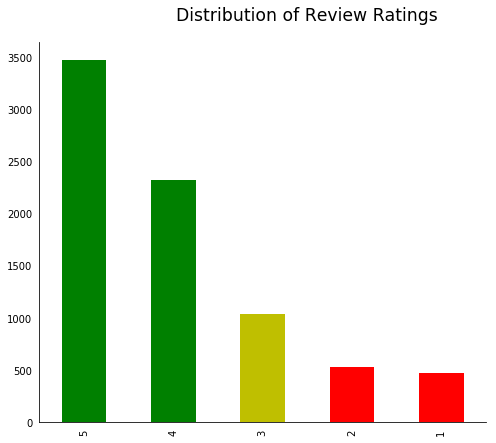

In [5]:
ax = katz['rating'].value_counts().plot(kind="bar", figsize = (8,7), color ="ggyrr")
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Distribution of Review Ratings", fontsize="xx-large").set_position([0.6, 1.04])
plt.show()

    It is obvious that we have more 4 and 5 stars ratings than lower ones.
    we will now create a column in our dataset to label the ratings as positive, neutral or negative.

In [6]:
# writing a function to label each review
def labels(row):
    if row >=4:
        return 'positive'
    elif row == 3:
        return 'neutral'
    else:
        return 'negative'

In [7]:
# applying the label to each rows in the df and writing them in a new colum named label
katz['label'] = katz['rating'].apply(labels)

    slicing out the positive and negative dataframe, we'll leave the neutral because we won't need it as it make create noise in our model and make it less accurate.

In [8]:
pos = katz.loc[katz['label']=='positive']
neg = katz.loc[katz['label']=='negative']

In [9]:
pos.head()

,date,location,rating,review,label
0,9/18/2020,"Reno, NV",5,Katz's does delivery! Nationwide!,positive
1,8/16/2020,"Los Angeles, CA",5,My phone says it's been 4 years since I enjoye...,positive
2,9/2/2020,"West Milford, NJ",5,There's not much to say that hasn't been said ...,positive
3,9/20/2020,"Manhattan, NY",5,I woke up craving a Reuben and no other deli w...,positive
4,9/21/2020,"Laveen Village, Laveen Village, AZ",4,"Latkas are great, pickles kind of taste like m...",positive


In [10]:
neg.head()

,date,location,rating,review,label
12,8/11/2020,"Franklin Square, NY",1,"Sunday, August 9, 2020 was excited to drive in...",negative
26,6/13/2020,"Brooklyn, NY",1,"Overpriced, overhyped, and not worth the trek.",negative
38,8/15/2020,"East Village, Manhattan, NY",1,"I was physically assaulted by the staff, I gav...",negative
80,12/24/2019,"Santa Rosa, CA",1,There's a reason this place is famous and fabu...,negative
125,6/15/2020,"San Diego, CA",2,Katz's Pastrami used to be great.. but now has...,negative


    We clean the review columns by removing unneccassary strings and tokenize the reviews of positive and negative dataframes

In [11]:
pos['review'] = pos['review'].str.replace(r'([^(a-zA-Z)\s])|\xa0','').astype(str)
neg['review'] = neg['review'].str.replace(r'([^(a-zA-Z)\s])|\xa0','').astype(str)

C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# the word_tokenize function helps us to split strings into words
tokenized_pos = pos['review'].apply(word_tokenize)
tokenized_neg = neg['review'].apply(word_tokenize)

In [13]:
# generating positive words tokens in a list
token_pos = []
for row in tokenized_pos:
    token_pos.extend(row)
token_pos[:10]

['Katzs',
 'does',
 'delivery',
 'Nationwide',
 'My',
 'phone',
 'says',
 'its',
 'been',
 'years']

In [14]:
# generating negative words token in a list
token_neg = []
for row in tokenized_neg:
    token_neg.extend(row)
token_neg[:10]

['Sunday',
 'August',
 'was',
 'excited',
 'to',
 'drive',
 'in',
 'from',
 'Long',
 'Island']

### OBSERVATION: 
    the tokens have some words that we don't need. 
    we will now write a funtion to :
    
    1. remove stop_words. stop_words are words the aren't important for knowing the sentiment of a text.
    2. change multiple words of the same form into their base words e.g beginning and begins to begin.

In [15]:
# this list shows some words known has stop words. They are words that have no particular sentiments attached to them.
# we remove this types of words from our word tokens
stop_words = list(set(stopwords.words('english')))
stop_words[:10]

['we', 'nor', 'its', 'she', "she's", 'doing', 'up', 'some', 'what', 'from']

In [16]:
# nltk lemmatizer is used to take words to their base words
lemmatizer = WordNetLemmatizer()

In [17]:
def add_to_bow(tokens):
    """
    the funtion takes in a list of words and a list. The function returns words that are abjectives after removing stop_words
    and saves it in the list.
    arg('str'): a list of strings of our tokenized words.
    returns(list): a list of words
    """
    stop_words = list(set(stopwords.words('english')))
#     picking words in tokens that are not stop_words and converting to their base words where neccessary.
    cleaned = [(lemmatizer.lemmatize(w)).lower() for w in tokens if not w.lower() in stop_words]
    return cleaned

In [18]:
pos_bows = add_to_bow(token_pos)
pos_bows[:10]

['katzs',
 'delivery',
 'nationwide',
 'phone',
 'say',
 'year',
 'since',
 'enjoyed',
 'one',
 '(']

In [19]:
neg_bows =  add_to_bow(token_neg)
neg_bows[:10]

['sunday',
 'august',
 'excited',
 'drive',
 'long',
 'island',
 'get',
 'city',
 'first',
 'time']

    some words are likely to appear more in our tokens that other words. We are interested in words with higher frequencies, so we create a frequency ditribution to pick the most frequently used words. For both positive and negative cases, we'll pick the top 600 words for two reasons:
    1. it will make our code processing faster and 
    2. it makes our word_cloud visualization and model training less bias.

In [20]:
ps = nltk.FreqDist(pos_bows)
# we pick the 600 most used words and rewrite it into the old_list
pos_bows = [i[0] for i in sorted(ps.items(), key=lambda x: x[1], reverse=True)][:600]

In [21]:
ng = nltk.FreqDist(neg_bows)
neg_bows = [i[0] for i in sorted(ng.items(), key=lambda x: x[1], reverse=True)][:600]

# CUSTOMER REVIEWS ANALYSIS

    In this section, we analysize customer needs from the customer reviews.
    I'll first use and wordcloud to visualize what the customers are frequently writing about in their reviews.
    To get more insight into the reviews, I will also use phrases instead of  single words for analysis and then  categorize each phrase into different service categories.

In [22]:
def wordcloud_draw(data,color ='black', title="title"):
    """
    this function takes in our tokens, joins them together to form a word_cloud
    which helps us to visualize the most used positive and negative words in the reviews.
    arg(list and strings): data refers to  the list of tokenized words.
    """
    text = ' '.join(data)
    wordcloud = WordCloud(background_color= color, width=3000, height=2000).generate(text)

    plt.figure(1, figsize = (15, 9))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation= "bilinear")
    plt.title(title, fontsize="xx-large").set_position([0.5, 1.05])
    plt.axis("off")
    plt.show()


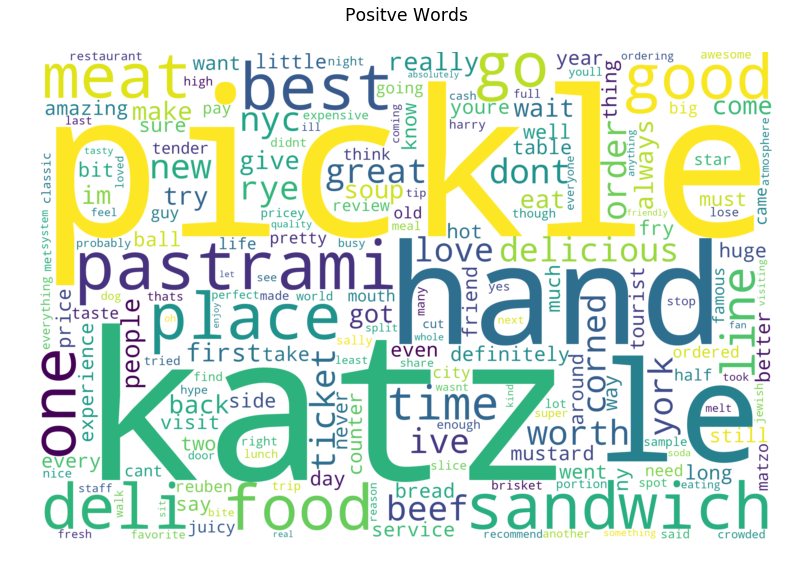

In [23]:
wordcloud_draw(pos_bows, 'white', title = "Positve Words")

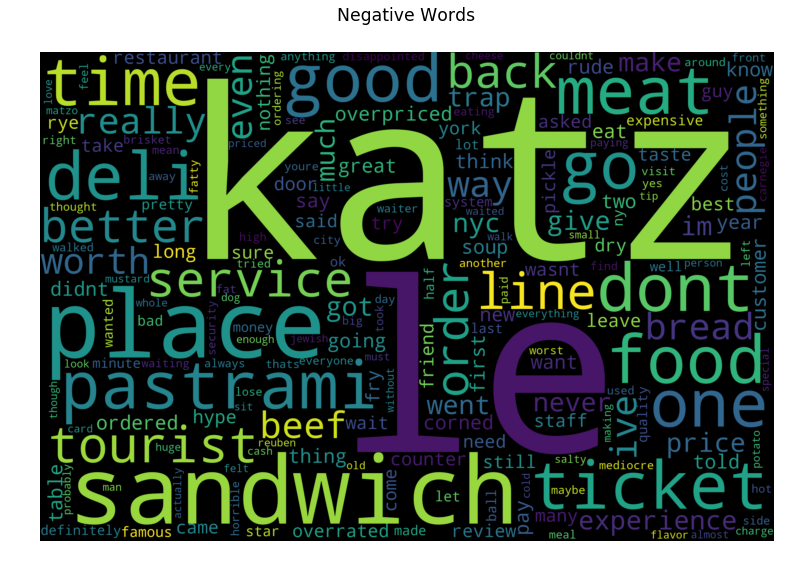

In [24]:
wordcloud_draw(neg_bows, title= "Negative Words")

## OBSERVATIONS:

    We notice some words are present in both positive and negative reviews.This is to be expected because customers could use them irrespective of the sentiments behind their statements. For example the name of the restaurant Katz can be used in a positive or negative sense. However, some words are more prominient in the negative reviews. Some of these words include:
    time, service, ticket,  tourist, overpriced and rude. These are very likely to be complaints about the waiting time, the staff and the cost of dishes.

    On the other hand, words like pickle, pastrami, best, great and hand are more frequently used in positive reviews.
    
#### To investigate this further, we know analyze  phrases as they give us a better idea of the customers' statements more than single words

In [25]:
# we lemmatize and remozed stop words from our tokenized list obtained above from the positive and negative dfs.
pos_list = tokenized_pos.apply(lambda x:[lemmatizer.lemmatize(item).lower() for item in x if item.lower() not in stop_words])
neg_list = tokenized_neg.apply(lambda x:[lemmatizer.lemmatize(item).lower() for item in x if item.lower() not in stop_words])

In [26]:
# converting the tokens into a list of lists
pos_list = list(filter(None, pos_list.tolist()))
neg_list = list(filter(None, neg_list.tolist()))
pos_list[:1]

[['katzs', 'delivery', 'nationwide']]

In [27]:
#  we will use the counter to count the number of the same phrase as they appear in all the lists
import collections 
pos_count = collections.Counter()
neg_count = collections.Counter()

In [28]:
# iterrating through each list and counting 2 word phrases.
for row in pos_list:
    pos_count.update(nltk.ngrams(row,2))
pos_phrase = pos_count.most_common(100)

In [29]:
for row in neg_list:
    neg_count.update(nltk.ngrams(row,2))
neg_phrase = neg_count.most_common(100)

In [30]:
# creating a dataframe for the phrases and their respective counts
pos_df = pd.DataFrame(pos_phrase, columns=["phrase", "count"])
neg_df = pd.DataFrame(neg_phrase, columns=["phrase", "count"])

In [31]:
neg_df.head()

,phrase,count
0,"(pastrami, sandwich)",150
1,"(tourist, trap)",110
2,"(corned, beef)",99
3,"(new, york)",66
4,"(ball, soup)",41


In [32]:
# we have the phrases in a tuple. We now write a funtion to remove the tuple
def remove_bracket(phrase):
    new_phrase = " ".join(phrase)
    return new_phrase

In [33]:
pos_df['phrase'] = pos_df['phrase'].apply(remove_bracket)
neg_df['phrase'] = neg_df['phrase'].apply(remove_bracket)

In [34]:
pos_df.head()

,phrase,count
0,pastrami sandwich,1313
1,best pastrami,648
2,new york,644
3,corned beef,618
4,pastrami rye,337


In [35]:
neg_df.head()

,phrase,count
0,pastrami sandwich,150
1,tourist trap,110
2,corned beef,99
3,new york,66
4,ball soup,41


In [36]:
# we change index to phrase column for visualization purpose
po = pos_df.set_index("phrase")
ne = neg_df.set_index("phrase")

In [37]:
# Now we create a function to plot the positive and negative phrases
def visualize(data,kind,color, title, xlabel, ylabel, size, leg=False,stk= False):
    ax= data.plot(kind=kind, figsize=size, color =color, stacked=stk)
    ax.set_title(title, fontsize="xx-large").set_position([0.5,1.05])
    ax.tick_params(left=False, bottom = False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(ylabel, fontsize ="x-large")
    ax.set_xlabel(xlabel, fontsize ="x-large")
    ax.get_legend().set_visible(leg)
    plt.show();

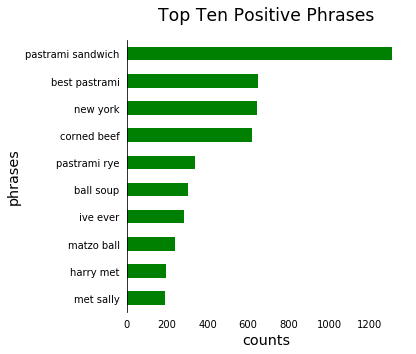

In [38]:
visualize(data = po.sort_values(by = "count").tail(10),kind='barh',title ='Top Ten Positive Phrases', xlabel='counts', ylabel='phrases', size=(5,5),color='g')

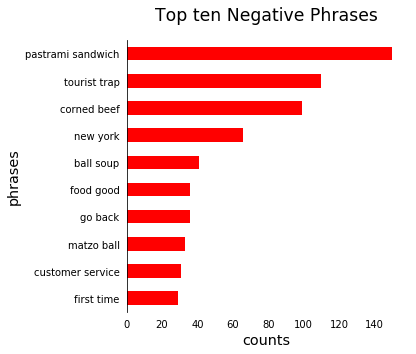

In [39]:
visualize(data = ne.sort_values(by = "count").tail(10),kind='barh',title ='Top ten Negative Phrases', xlabel='counts', ylabel='phrases', size=(5,5),color='r')

    What we see here are the top positive and negative phrases. However, we notice a repetition of same phrases in different forms. To help us get a better visualiation, we'll merge the two dataframes and categorize the phrases. 

In [40]:
# merging the positive and negative df with an outer merge
merg_df = pd.merge(left = pos_df, right = neg_df, on="phrase", right_index=False, left_index=False, how="outer", sort =True, suffixes=("_pos","_neg"))

In [41]:
merg_df.head()

,phrase,count_pos,count_neg
0,( ),61.0,NaN
1,amazing pastrami,53.0,NaN
2,ball soup,304.0,41.0
3,beef pastrami,134.0,12.0
4,beef sandwich,147.0,28.0


In [42]:
# we change all the missing values to zero because NAN means there were no occurences.
merg_df.loc[merg_df["count_pos"].isnull(),"count_pos"]=0
merg_df.loc[merg_df["count_neg"].isnull(),"count_neg"]=0

In [43]:
# we now create a new column that takes in the total of the positive and negative counts
merg_df['total_count'] = merg_df["count_pos"] + merg_df["count_neg"]

In [44]:
# we find out the unique keywords in the merged df to help us categorize the phrases
merg_df['phrase'].unique()

array(['( )', 'amazing pastrami', 'ball soup', 'beef pastrami',
       'beef sandwich', 'behind counter', 'best deli', 'best ive',
       'best pastrami', 'best sandwich', 'better pastrami',
       'better sandwich', 'bit pricey', 'brisket sandwich',
       'carnegie deli', 'come back', 'corn beef', 'corned beef',
       'credit card', 'customer service', 'definitely worth', 'deli nyc',
       'delicious pastrami', 'dont get', 'dont go', 'dont know',
       'dont lose', 'dont think', 'dont waste', 'dr browns', 'east side',
       'egg cream', 'even though', 'every time', 'everything else',
       'famous pastrami', 'feel like', 'felt like', 'first time',
       'food good', 'french fry', 'get pastrami', 'get ticket',
       'give star', 'give ticket', 'go back', 'going back', 'good food',
       'good pastrami', 'got pastrami', 'great food', 'great pastrami',
       'great place', 'half price', 'half sandwich', 'harry met',
       'hot dog', 'hot pastrami', 'im sure', 'ive better', 'iv

In [45]:
def categorize(word):
    """
    This function is used to  iterates through a list of of diffrerent categories that phrases fall into. 
    if a phrase is present in a certain category, we input the category name into the category column.
    """
    food = [
        "pastrami","sandwich", "food","beef", "soup","deli",
        "eat","taste","fry","meat","salad","pickle","ball",
        "bread","liver","turkey","pea","dog","ive ever","egg","cream",
        "rye","tender","flavorful","juicy","potato","russian","guy" ]

    
    cus_serv = ["service","guard","staff", "counter", "rude","order","ordering","guy","people"]
    
    price=["price","overrated","tourist trap","penny","high"]
    
    ticket = ["ticket","card", "credit", "cash","money"]
    
    repute = [
        "place", "katz", "sally","harry", "recommend","hype","worth",
        "overrated","overhype","better","best","good","try","first",
        "last","come","back","visit","go","tourist","never","went",
        "wrong","somewhere","special","star","sense","waste","old","glad",
        "excited","feel","felt","experience","wasnt","worst","dont","wont"
    ]
    
    location = ["new york", "yorker","nyc","city","big"]
    
    wait_time = ["line", "long", "waste time","time","wait"]
    
    for fd in food:
        if fd in word:
            return "food"
    for c_s in cus_serv:
        if c_s in word :
            return "customer service"
    for p in price:
        if p in word :
            return "pricing"
    for wait in wait_time:
        if wait in word :
            return "wait time"
    for rep in repute:
        if rep in word :
            return "customer experience"
    for loc in location:
        if loc in word :
            return "location"
    for t in ticket:
        if t in word :
            return "ticketing and payment"
    return "others"

In [46]:
# create a new column name category
merg_df['category'] = merg_df['phrase'].apply(categorize)

In [47]:
merg_df.sort_values(by='count_neg', ascending=False).head()

,phrase,count_pos,count_neg,total_count,category
114,pastrami sandwich,1313.0,150.0,1463.0,food
142,tourist trap,72.0,110.0,182.0,pricing
17,corned beef,618.0,99.0,717.0,food
95,new york,644.0,66.0,710.0,location
2,ball soup,304.0,41.0,345.0,food


In [48]:
merg_df.loc[merg_df['category']=='others','phrase'].unique()

array(['( )', 'dr browns', 'east side', 'even though', 'everything else',
       'im sure', 'late night', 'let u', 'like cattle', 'like criminal',
       'lower east', 'make sure', 'melt mouth'], dtype=object)

In [49]:
# we now create a pivot table
merg_tab = merg_df.pivot_table(index="category", values = ["count_pos","count_neg","total_count"],aggfunc="sum").sort_values("total_count")

In [50]:
merg_tab

,count_neg,count_pos,total_count
category,,,
customer service,93.0,226.0,319.0
pricing,156.0,168.0,324.0
ticketing and payment,93.0,268.0,361.0
wait time,98.0,552.0,650.0
others,81.0,634.0,715.0
location,80.0,774.0,854.0
customer experience,426.0,1632.0,2058.0
food,912.0,7726.0,8638.0


In [51]:
# as in above the phrases in the others category can't be properly understood, so we drop others row.
merg_tab.drop("others", axis=0, inplace=True)

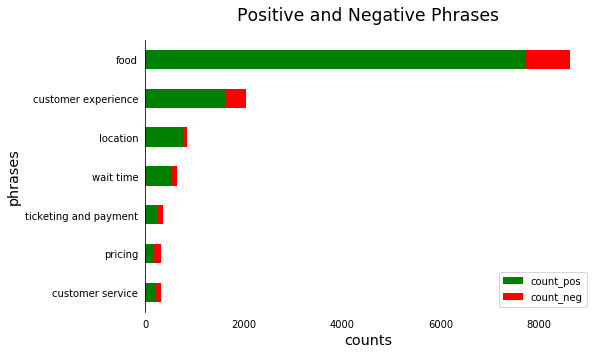

In [52]:
visualize(data = merg_tab[["count_pos","count_neg"]],kind='barh',title ='Positive and Negative Phrases', xlabel='counts', ylabel='phrases', size=(8,5),color='gr',stk=True, leg=True)

## OBSERVATION:
   From our plot, it is now very clear that customers generally love the food and their experience eating in the restaurant is pleasant. However, there are higher concerns over the price of food than any other service category.

# MACHINE LEARNING

In [53]:
# creating a list for both positive and negetive bag of words
all_words = []
all_words.extend(pos_bows)
all_words.extend(neg_bows)

In [54]:
len(all_words)

1200

In [55]:
# Generate a frequency distritution dictionary for bag of words 
Bow_freq = nltk.FreqDist(all_words)

In [56]:
features = [i[0] for i in sorted(Bow_freq.items(), key=lambda x: x[1], reverse=True)]

In [57]:
len(features)

751

    Next we create a list that we'll call documents and append all our original positive and negative reviews in addition to the labels.labels are either positive or negative.We tokenize the document into pieces of words and find out if the words we have in features are also in each of tokenized documents. The results will be our feature set that we'll use for training and testing our models.

In [58]:
document=[]
for sent in pos['review']:
    document.append( (sent.lower(),'positive') )

In [59]:
for sent in neg['review']:
    document.append((sent.lower(),'negative'))

In [60]:
def find_features(doc):
    """
    this funtion takes in a document and tokenize it. 
    Thereafter, for each word in our features, we check if we have this in the tokenized tokenment.
    each word in features becomes the key of the checked_features dict and the values are either boolean True or False
    """
    docs = word_tokenize(doc)
    checked_features ={}
    for w in features:
        checked_features[w] = (w in docs)
    return checked_features

In [61]:
# applying the fuction to the document that contains all reviews in our dataset.
# The feature_set is a list of two parts: the dictionary and positive/negative.
feature_set = [(find_features(rev),category) for (rev, category) in document]

In [62]:
import random
random.shuffle(feature_set)

In [63]:
len(feature_set)

6809

In [64]:
# we divide the feature_set into training and test sets.
training_set = feature_set[:5500]
test_set = feature_set[5500:]

In [65]:
# importing various classifier algorithms
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [66]:
# we train with the algorithms and check their accuracy. 

nb_cls = nltk.NaiveBayesClassifier.train(training_set)
print("Classifier accuracy percent:",(nltk.classify.accuracy(nb_cls, test_set))*100)
nb_cls.show_most_informative_features(10)

MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set))*100)

BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set))*100)

LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set))*100)

SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set))*100)

SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set))*100)

RF_clf = SklearnClassifier(RandomForestClassifier())
RF_clf.train(training_set)
print("RandomForest accuracy percent:", (nltk.classify.accuracy(RF_clf, test_set))*100)


Classifier accuracy percent: 89.22841864018335
Most Informative Features
                mediocre = True           negati : positi =     43.6 : 1.0
                criminal = True           negati : positi =     32.3 : 1.0
                  filthy = True           negati : positi =     32.3 : 1.0
                received = True           negati : positi =     32.3 : 1.0
               tasteless = True           negati : positi =     31.7 : 1.0
                horrible = True           negati : positi =     30.5 : 1.0
                 fucking = True           negati : positi =     28.5 : 1.0
                     meh = True           negati : positi =     23.9 : 1.0
              disgusting = True           negati : positi =     23.4 : 1.0
                   worst = True           negati : positi =     23.1 : 1.0
MNB_classifier accuracy percent: 91.29106187929717
BernoulliNB_classifier accuracy percent: 88.77005347593582
LogisticRegression_classifier accuracy percent: 91.29106187929717


C:\Users\Ikeen\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier_classifier accuracy percent: 87.31856378915202
SVC_classifier accuracy percent: 85.79067990832698
RandomForest accuracy percent: 89.83957219251337


    We now create a list of fresh reviews of another restuarant on Yelp and test them on the best performing model.

In [67]:
reviews= ["Was simply amazing. And that tea leaf salad. Definitely coming back!",
          
"""Used to be good. I have no idea how it got so bad. Everything tasted like leftovers from last week.
Shrimp were mush. Platha was a brick. No way it was made that day. Rainbow salad was 90% cabbage and noodles.
No visible papaya. Eggplant was edible. The rest was not. Too bad""",
          
"""I just really don't understand why people wait in line to eat here. 
The first time I ate here, after waiting outside for an hour to be seated, I was underwhelmed with the food and 
just generally disappointed after hearing so many rave reviews from friends. But I figured that could just have 
been an off day or that perhaps I just hadn't ordered the right dish, especially since people really seem to love this place. 
So I went back and tried it a few more times. I've tried to like this place, I really have. But the food just isn't that great. 
I tried the famed tea leaf salad...why do people love this dish so much? Is it just because it is a unique dish that you won't 
see at other places? Because aside from that I just don't see what the big deal is. I think people just feel special saying 
\"tea leaf salad\". Seriously I don't know what else would make someone say this is such a good dish. I tried many other items
there as well and it's just rather ordinary asian food. The garlic noodles, citrus chicken, and everything else I tried there 
left me totally underwhelmed and questioning why I've spent hours of my life standing around outside this place waiting to eat
this completely overrated food. The portions are small, too. I definitely would not wait in line to eat there again. 
Actually, I'm just going to say it, I wouldn't eat there again at all. I read these yelp reviews to try to understand the appeal
and I noticed that 9 out of 10 of the rave reviews appear to have been written by young women. Maybe chicks just like being able
to tell their friends \"ohhmygawd I had the tea leaf salad and it was ah-mazing\". 
Or, maybe they enjoy getting to drag their poor boyfriends here when it's their turn to pick a restaurant. 
I don't know. All I know is it's definitely not the food. This place sucks.""",
          
"""Great place, I've been here a couple times but just now posting review because I wanted to try a few more dishes before saying this place Â is DELICIOUS.
Service is great, the dishes come fast and hot. There is always a wait so do call in or get on waitlist. Must try.""",
          
"""Okay I don't get it? I love Burmese food and if try this place several times. And always seems to have them a line to get in.
The staff inspired with walkie talkies and earpieces.""",
          
"""The wait for this place is not worth it. I waited one hour and a half only to enjoy a mediocre meal. 
I'm either cursed by the hype or the food quality has went down. I'm not from the area and it's my 
first time here so I'm not sure what it could've been. I do not consider myself to have a fair share of Burmese cuisine
but I do know that they're usually a unique combination of spices and seasonings. I have my favorite Burmese 
restaurant on the east side but Burma Superstar did not compare.""",
          
"""I was driving through SF and was starving when I saw on my yelp app that there's a Burma Superstar in SF--awesome.
Â I've only ever been to the one in Oakland. Â I have to say, this just did not live up to the Oakland restaurant's 
standards. Â The waitstaff, host etc were all super nice, but the food was just not that good. 
Â The Samusa salad was off, and the sesame chicken was not crisp, gooey and meh. Â We were there really late, 
and maybe being the last seating we got the dregs of the night. Â But I was really disappointed. 
Â I think I'll stick to the one in Oakland."""]

In [68]:
def sent_log(text):
    feature = find_features(text)
    return LogReg_clf.classify(feature)

In [69]:
for rev in reviews:
    print('The sentiment of this statement is: {}'.format(sent_log(rev)))

The sentiment of this statement is: positive
The sentiment of this statement is: negative
The sentiment of this statement is: negative
The sentiment of this statement is: positive
The sentiment of this statement is: positive
The sentiment of this statement is: negative
The sentiment of this statement is: negative


    Our Logistic Regression model correctly predicted 6 out of 7 reviews. That's near perfect! The 5th review is a sarcastic statement so it is understandable why the model couldn't predict its sentiment correctly.

## CONCLUSION:
    The sentiment analysis of customer reviews of the restaurant prove to be very effective. It is apparent that the business have to look majorly at their food pricing. They should also address concerns over wait time, customer service and ticketing and payment sytem before they get out of hand.
    
    Our model also affords us the convenience of predicting future reviews as positive or negative. This saves us the time of reading each review to find out what the customers feel about the services and food.
    
    We could also improve this model by predicting the service category each of negative or positive review fall into.